In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import json

In [3]:
all_embeddings = np.load('datasets/annotations/humanml3d/sent_embeddings/sentence-transformers/all-mpnet-base-v2.npy')
with open('datasets/annotations/humanml3d/sent_embeddings/sentence-transformers/all-mpnet-base-v2_index.json', 'r') as file:
    all_indices = json.load(file)

In [27]:
ours_indices = []
with open ('comparitive_metrics/annotations/t2m_threshold_0.95_ours.txt', 'r') as file:
    for line in file:
        line = line[:-1]
        ours_indices.append(all_indices[line])

ours_embeddings = all_embeddings[ours_indices]

In [28]:
vanilla_indices = []
with open ('comparitive_metrics/annotations/t2m_threshold_0.95_vanilla.txt', 'r') as file:
    for line in file:
        line = line[:-1]
        vanilla_indices.append(all_indices[line])

vanilla_embeddings = all_embeddings[vanilla_indices]

In [29]:
print(f"all: {all_embeddings.shape}")
print(f"ours: {ours_embeddings.shape}")
print(f"vanilla: {vanilla_embeddings.shape}")

all: (55833, 768)
ours: (766, 768)
vanilla: (806, 768)


In [37]:
ours_reduced = TSNE(n_components=2, perplexity=240.0,random_state=0).fit_transform(ours_embeddings)
vanilla_reduced = TSNE(n_components=2, perplexity=240.0,random_state=0).fit_transform(vanilla_embeddings)

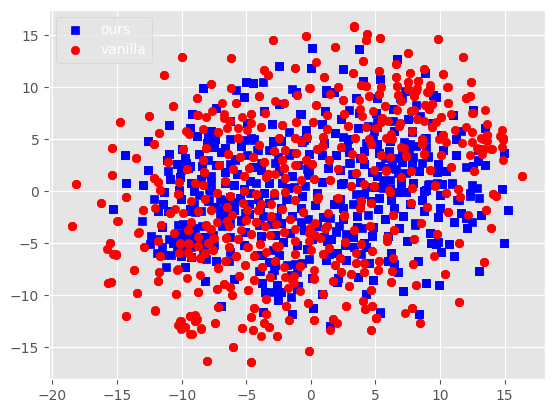

In [38]:
x = range(100)
y = range(100,200)
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(ours_reduced[:, 0], ours_reduced[:, 1], c='b', marker="s", label='ours')
ax1.scatter(vanilla_reduced[:, 0], vanilla_reduced[:, 1], c='r', marker="o", label='vanilla')
plt.legend(loc='upper left')
plt.show()
